# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'citipy'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
print(len(lats))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
        

# Print the city count to confirm sufficient count
len(cities)

1500


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

lats = []
lngs = []
temp_maxes = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []


for index in range(len(cities)):
    
    
    params = {
        "units": "imperial",
        "appid": weather_api_key,
        "q"    : cities[index]
    }
    
    # run a request using our params dictionary
    try:
        print(f"Processing Record {index+1:>3} of Set 1 | {cities[index]}")
        response = requests.get(base_url, params=params).json()

        lats.append(   response['coord']['lat']   )
        lngs.append(   response['coord']['lon']   )
        temp_maxes.append(   response['main']['temp_max']   )
        humidities.append(   response['main']['humidity']   )
        cloudinesses.append(   response['clouds']['all']   )
        wind_speeds.append(   response['wind']['speed']   )
        countries.append(   response['sys']['country']   )
        dates.append(   response['dt']   )
    except:
        print("Error.")
        lats.append(None)
        lngs.append(None)
        temp_maxes.append(None)
        humidities.append(None)
        cloudinesses.append(None)
        wind_speeds.append(None)
        countries.append(None)
        dates.append(None)
    
        


Processing Record   1 of Set 1 | ushuaia
Processing Record   2 of Set 1 | sao jose do belmonte
Processing Record   3 of Set 1 | upernavik
Processing Record   4 of Set 1 | lolua
Error.
Processing Record   5 of Set 1 | rikitea
Processing Record   6 of Set 1 | novodolinskiy
Processing Record   7 of Set 1 | severo-kurilsk
Processing Record   8 of Set 1 | punta arenas
Processing Record   9 of Set 1 | albany
Processing Record  10 of Set 1 | burnie
Processing Record  11 of Set 1 | east london
Processing Record  12 of Set 1 | mao
Processing Record  13 of Set 1 | vila velha
Processing Record  14 of Set 1 | college
Processing Record  15 of Set 1 | gat
Processing Record  16 of Set 1 | hilo
Processing Record  17 of Set 1 | illoqqortoormiut
Error.
Processing Record  18 of Set 1 | saldanha
Processing Record  19 of Set 1 | avarua
Processing Record  20 of Set 1 | kirakira
Processing Record  21 of Set 1 | butaritari
Processing Record  22 of Set 1 | bredasdorp
Processing Record  23 of Set 1 | kodiak
Pro

Processing Record 192 of Set 1 | ribas do rio pardo
Processing Record 193 of Set 1 | pevek
Processing Record 194 of Set 1 | buin
Processing Record 195 of Set 1 | cape town
Processing Record 196 of Set 1 | phan rang
Error.
Processing Record 197 of Set 1 | faya
Processing Record 198 of Set 1 | ordubad
Processing Record 199 of Set 1 | urdzhar
Error.
Processing Record 200 of Set 1 | poum
Processing Record 201 of Set 1 | haapu
Error.
Processing Record 202 of Set 1 | opuwo
Processing Record 203 of Set 1 | vermillion
Processing Record 204 of Set 1 | souillac
Processing Record 205 of Set 1 | adre
Processing Record 206 of Set 1 | bethel
Processing Record 207 of Set 1 | pascagoula
Processing Record 208 of Set 1 | gornopravdinsk
Processing Record 209 of Set 1 | chuy
Processing Record 210 of Set 1 | attawapiskat
Error.
Processing Record 211 of Set 1 | apollonia
Processing Record 212 of Set 1 | puntarenas
Processing Record 213 of Set 1 | saint-philippe
Processing Record 214 of Set 1 | vidalia
Proce

Processing Record 382 of Set 1 | yarovoye
Processing Record 383 of Set 1 | ulladulla
Processing Record 384 of Set 1 | new glasgow
Processing Record 385 of Set 1 | cabedelo
Processing Record 386 of Set 1 | perth
Processing Record 387 of Set 1 | wanning
Processing Record 388 of Set 1 | bubaque
Processing Record 389 of Set 1 | banepa
Processing Record 390 of Set 1 | itoman
Processing Record 391 of Set 1 | zholymbet
Processing Record 392 of Set 1 | pavilosta
Processing Record 393 of Set 1 | taoudenni
Processing Record 394 of Set 1 | cap malheureux
Processing Record 395 of Set 1 | mitu
Processing Record 396 of Set 1 | canakkale
Processing Record 397 of Set 1 | manavalakurichi
Processing Record 398 of Set 1 | saint-paul
Processing Record 399 of Set 1 | mongo
Processing Record 400 of Set 1 | timra
Processing Record 401 of Set 1 | mabaruma
Processing Record 402 of Set 1 | sangar
Processing Record 403 of Set 1 | beringovskiy
Processing Record 404 of Set 1 | huilong
Processing Record 405 of Set 

Processing Record 576 of Set 1 | el dorado
Processing Record 577 of Set 1 | tumannyy
Error.
Processing Record 578 of Set 1 | rawannawi
Error.
Processing Record 579 of Set 1 | rungata
Error.
Processing Record 580 of Set 1 | kisanga
Processing Record 581 of Set 1 | balilihan
Processing Record 582 of Set 1 | gorontalo
Processing Record 583 of Set 1 | kudahuvadhoo
Processing Record 584 of Set 1 | klaksvik
Processing Record 585 of Set 1 | dolbeau
Error.
Processing Record 586 of Set 1 | cayambe
Processing Record 587 of Set 1 | itambacuri
Processing Record 588 of Set 1 | iisalmi
Processing Record 589 of Set 1 | mayo
Processing Record 590 of Set 1 | samut songkhram
Processing Record 591 of Set 1 | lata
Processing Record 592 of Set 1 | salalah
Processing Record 593 of Set 1 | surok
Processing Record 594 of Set 1 | ossora
Processing Record 595 of Set 1 | byron bay
Processing Record 596 of Set 1 | itajuba
Processing Record 597 of Set 1 | korla
Processing Record 598 of Set 1 | burkhala
Error.
Proc

In [17]:
cities_df = pd.DataFrame({
    "City:": cities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temp': temp_maxes,
    'Humidity': humidities,
    'Cloudiness': cloudinesses,
    'Wind Speed': wind_speeds,
    'Country': countries,
    'Date': dates
})
print("Original # of cities: " + str(len(cities_df)))
      
cities_cleaned_df = cities_df.dropna()
print("Cleaned # of cities: "+ str(len(cities_cleaned_df)))
cities_cleaned_df = cities_cleaned_df.reset_index()
cities_cleaned_df = cities_cleaned_df.drop('index', axis=1)
cities_cleaned_df['Date'] = cities_cleaned_df['Date'].astype("int")
cities_cleaned_df.head()

Original # of cities: 636
Cleaned # of cities: 586


,City:,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,40.66,87.0,40.0,32.21,AR,1651181945
1,sao jose do belmonte,-7.8614,-38.7597,78.76,59.0,78.0,14.99,BR,1651182170
2,upernavik,72.7868,-56.1549,15.98,87.0,39.0,3.85,GL,1651182170
3,rikitea,-23.1203,-134.9692,77.20,65.0,31.0,20.31,PF,1651182061
4,novodolinskiy,49.7050,72.7047,39.78,40.0,94.0,6.13,KZ,1651182171


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
cities_cleaned_df.to_csv("Resources/cities_weather.csv", encoding="utf-8", index=False, header=True)

In [3]:
# Reading file to pick up where I left off.
cities_cleaned_df = pd.read_csv("Resources/cities_weather.csv", encoding='utf-8')
cities_cleaned_df.head()

,City:,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,40.66,87.0,40.0,32.21,AR,1651181945
1,sao jose do belmonte,-7.8614,-38.7597,78.76,59.0,78.0,14.99,BR,1651182170
2,upernavik,72.7868,-56.1549,15.98,87.0,39.0,3.85,GL,1651182170
3,rikitea,-23.1203,-134.9692,77.20,65.0,31.0,20.31,PF,1651182061
4,novodolinskiy,49.7050,72.7047,39.78,40.0,94.0,6.13,KZ,1651182171


In [23]:
cities_cleaned_df.describe().round(3)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000,586.000,586.000,586.000,586.000,586.000,5.860000e+02
mean,19.686,18.567,60.432,70.476,56.459,7.770,1.651182e+09
std,33.154,89.011,20.061,22.333,39.147,5.786,9.545100e+01
min,-54.800,-179.167,0.050,1.000,0.000,0.000,1.651182e+09
25%,-7.558,-54.863,48.100,57.250,17.000,3.440,1.651182e+09
50%,22.785,23.514,62.940,75.500,70.000,6.295,1.651182e+09
75%,46.616,94.367,77.598,88.000,98.000,10.360,1.651182e+09
max,78.219,179.317,93.450,100.000,100.000,32.210,1.651182e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

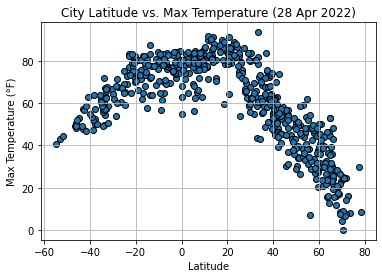

In [10]:
plt.scatter(cities_cleaned_df['Lat'], cities_cleaned_df['Max Temp'], marker = 'o', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title("City Latitude vs. Max Temperature (28 Apr 2022)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

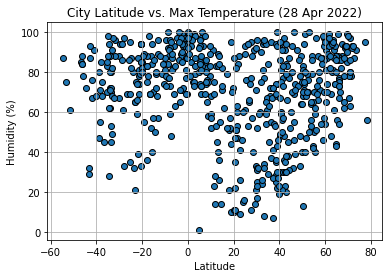

In [73]:
plt.scatter(cities_cleaned_df['Lat'], cities_cleaned_df['Humidity'], marker = 'o', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Max Temperature (28 Apr 2022)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

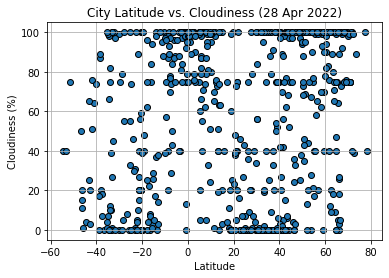

In [27]:
plt.scatter(cities_cleaned_df['Lat'], cities_cleaned_df['Cloudiness'], marker = 'o', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (28 Apr 2022)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

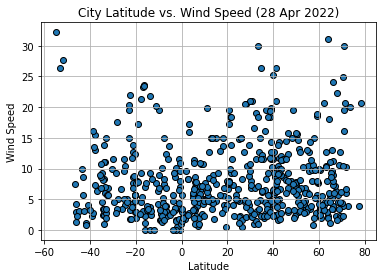

In [26]:
plt.scatter(cities_cleaned_df['Lat'], cities_cleaned_df['Wind Speed'], marker = 'o', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed (28 Apr 2022)")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8746454780513918


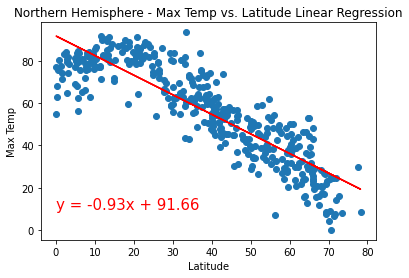

In [42]:
northern_hemi_df = cities_cleaned_df.loc[cities_cleaned_df['Lat'] >= 0]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7962576746015049


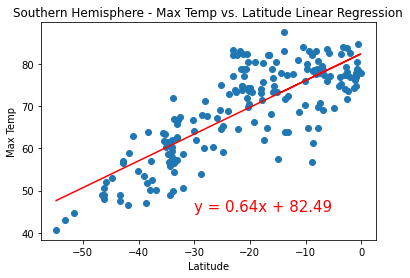

In [45]:
southern_hemi_df = cities_cleaned_df.loc[cities_cleaned_df['Lat'] <= 0]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12170065457403056


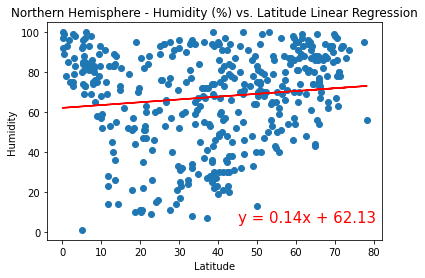

In [48]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24182317706635217


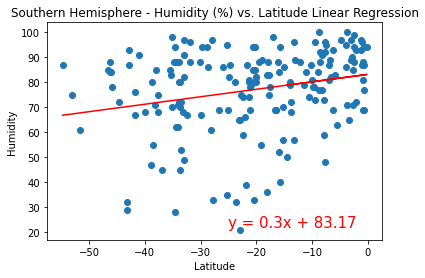

In [53]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07619495448517034


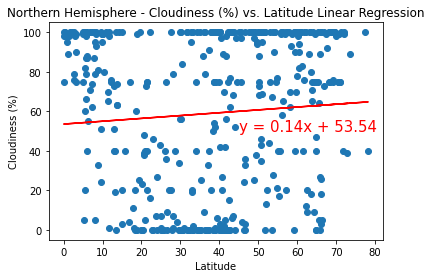

In [67]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4024083253648786


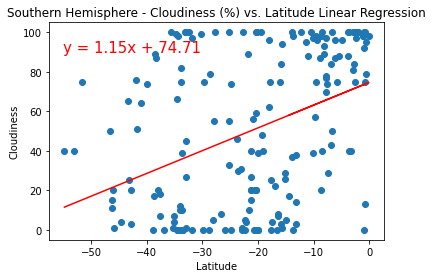

In [56]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11131580155720117


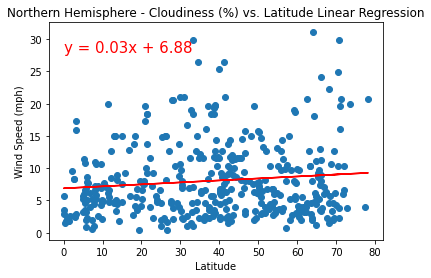

In [64]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19310379395943272


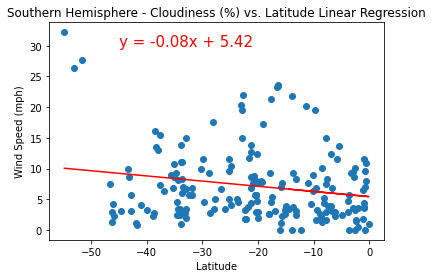

In [62]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.04849729194749068


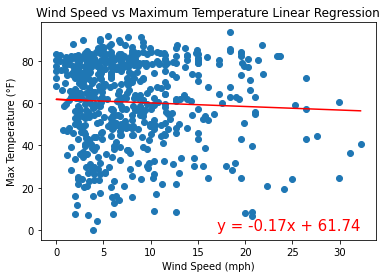

In [68]:
x_values = cities_cleaned_df['Wind Speed']
y_values = cities_cleaned_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,0),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Max Temperature (°F)')
plt.title('Wind Speed vs Maximum Temperature Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.16070512424266467


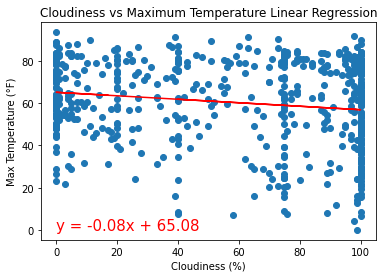

In [71]:
x_values = cities_cleaned_df['Cloudiness']
y_values = cities_cleaned_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Max Temperature (°F)')
plt.title('Cloudiness vs Maximum Temperature Linear Regression')
print(f"The r-value is: {rvalue}")
plt.show()